In [1]:
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from matplotlib import pyplot as plt

bayesian = '/mnt/bn/ai4s-hl/bamboo/hongyi/debug/moler/data/bayesian_generated_sum_01.json'
generation = '/mnt/bn/ai4s-hl/bamboo/hongyi/debug/moler/data/decoded_07_cleaned_ensembled.json'

In [2]:
with open(bayesian) as f:
    mol_b = json.load(f)

with open(generation) as f:
    mol_g = json.load(f)

# mol_b = [d['decoded_molecule'] for d in mol_b]
mol_all = [d['decoded_molecule'] for d in mol_b] + [d['decoded_molecule'] for d in mol_g]

In [3]:
len(mol_b), len(mol_g), len(mol_all)

(8314, 24099, 32413)

In [4]:
# get molecule size, ring, aromatic_ring (histogram)
rdmols_g = [Chem.MolFromSmiles(s['decoded_molecule']) for s in mol_g]
rdmols_b = [Chem.MolFromSmiles(s['decoded_molecule']) for s in mol_b]
size_g = [rdMolDescriptors.CalcExactMolWt(m) for m in rdmols_g]
size_b = [rdMolDescriptors.CalcExactMolWt(m) for m in rdmols_b]
atoms_g = [rdMolDescriptors.CalcNumAtoms(m) for m in rdmols_g]
atoms_b = [rdMolDescriptors.CalcNumAtoms(m) for m in rdmols_b]
rings_g = [rdMolDescriptors.CalcNumRings(m) for m in rdmols_g]
rings_b = [rdMolDescriptors.CalcNumRings(m) for m in rdmols_b]
ars_g = [rdMolDescriptors.CalcNumAromaticRings(m) for m in rdmols_g]
ars_b = [rdMolDescriptors.CalcNumAromaticRings(m) for m in rdmols_b]

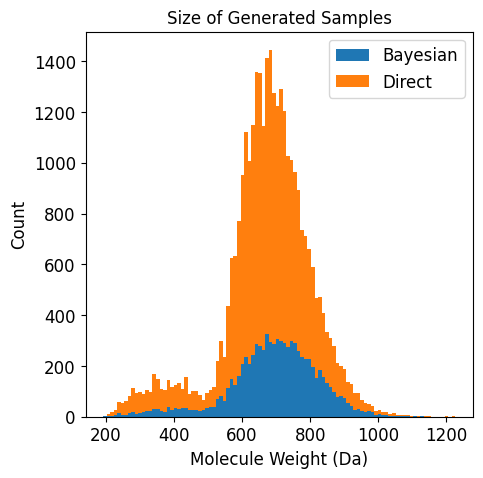

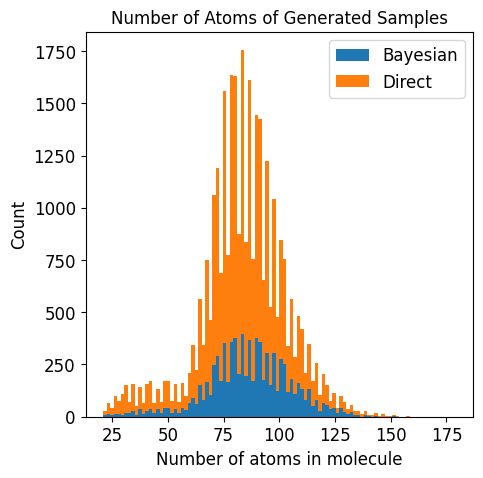

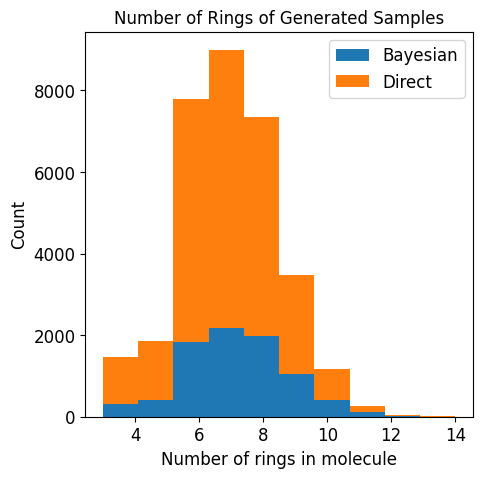

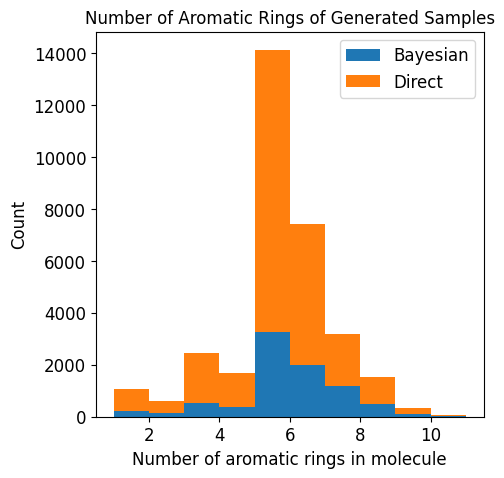

In [5]:
# size
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((size_b, size_g), bins=100, stacked=True)
ax.set_title("Size of Generated Samples", fontsize=12)
ax.set_xlabel("Molecule Weight (Da)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

# atoms
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((atoms_b, atoms_g), bins=100, stacked=True)
ax.set_title("Number of Atoms of Generated Samples", fontsize=12)
ax.set_xlabel("Number of atoms in molecule", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

# rings
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((rings_b, rings_g), bins=10, stacked=True)
ax.set_title("Number of Rings of Generated Samples", fontsize=12)
ax.set_xlabel("Number of rings in molecule", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

# ars
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((ars_b, ars_g), bins=10, stacked=True)
ax.set_title("Number of Aromatic Rings of Generated Samples", fontsize=12)
ax.set_xlabel("Number of aromatic rings in molecule", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

In [8]:
# get predicted labels
soqy_g = [s['phi_singlet_oxygen'][0] for s in mol_g]
soqy_b = [s['phi_singlet_oxygen'][0] for s in mol_b]
abs_g = [s['max_absorption'][0][0] for s in mol_g]
abs_b = [s['max_absorption'][0] for s in mol_b]
logp_g = [s['log_p'][0] for s in mol_g]
logp_b = [s['log_p'][0] for s in mol_b]
sas_g = [s['sas'][0] for s in mol_g]
sas_b = [s['sas'][0] for s in mol_b]

In [7]:
print(mol_g[0])

{'max_absorption': [[568.8602294921875, 44.841609954833984]], 'phi_singlet_oxygen': [0.7570397853851318, 0.21480411291122437], 'decoded_molecule': 'COC1=CC(O)=C2C(=O)C(OC)=C3C4=C5C6=C(C(OC)=C7SCC(C8=CC=C(OC(C)=O)C=C8)(C8=CC=C(S(C)(=O)=O)C=C8)NC7=C6C(=O)C(OC)=C5C(OC(C)=O)C(C)=C3C(C)=O)C1=C24', 'log_p': [7.405900000000009, 0], 'sas': [5.086964477727607, 0]}


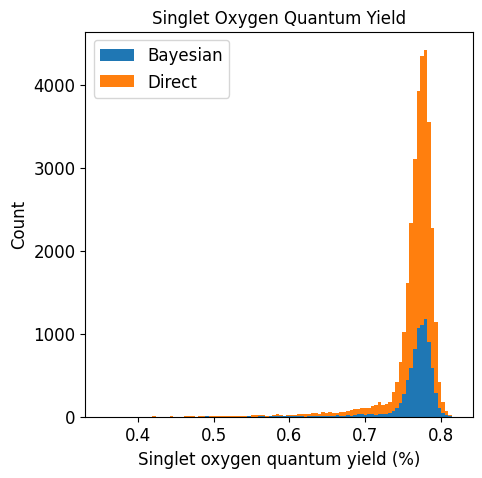

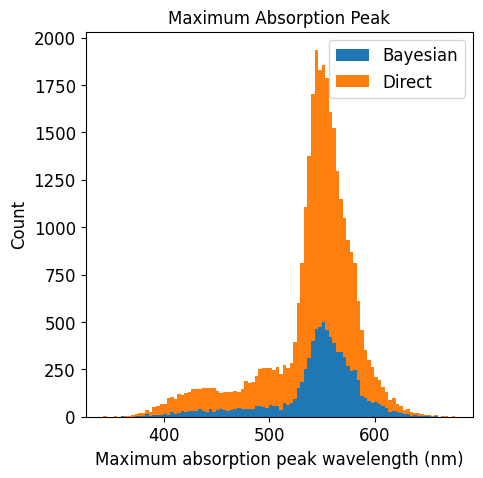

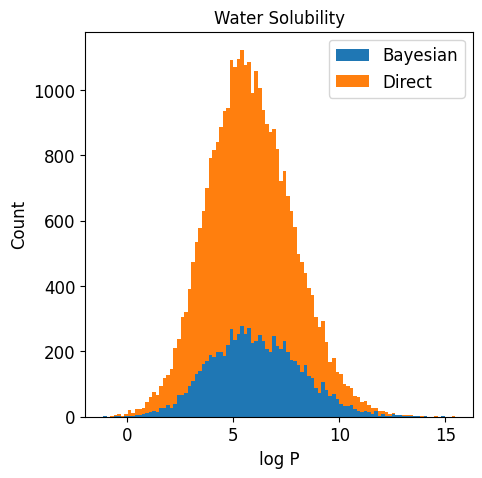

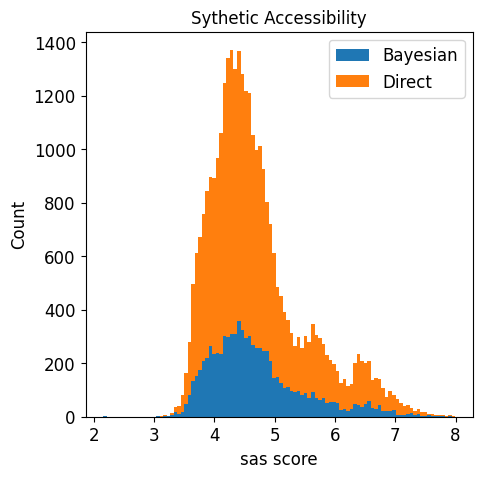

In [9]:
# soqy
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((soqy_b, soqy_g), bins=100, stacked=True)
ax.set_title("Singlet Oxygen Quantum Yield", fontsize=12)
ax.set_xlabel("Singlet oxygen quantum yield (%)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

# abs
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((abs_b, abs_g), bins=100, stacked=True)
ax.set_title("Maximum Absorption Peak", fontsize=12)
ax.set_xlabel("Maximum absorption peak wavelength (nm)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

# logp
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((logp_b, logp_g), bins=100, stacked=True)
ax.set_title("Water Solubility", fontsize=12)
ax.set_xlabel("log P", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

# sas
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.tick_params(axis='both', labelsize=12)
ax.hist((sas_b, sas_g), bins=100, stacked=True)
ax.set_title("Sythetic Accessibility", fontsize=12)
ax.set_xlabel("sas score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(["Bayesian", "Direct"], fontsize=12)
fig.show()

In [32]:
# draw some typical molecules from bayesian
new_mol = sorted(mol_b, key=lambda x: x['phi_singlet_oxygen'], reverse=True)
# print(new_mol_b[:40])
i = 0
for mol in new_mol:
    m = Chem.MolFromSmiles(mol['decoded_molecule'])
    img = Draw.MolToImage(m)
    img.save(f'/mnt/bn/ai4s-hl/bamboo/hongyi/debug/moler/data/bayesian_02_img/{i}.png')
    i += 1